# **Women Cloth Reviews Prediction with Multi Nomial Naive Bayes**

-------------

## **Objective**

The objective of this project is to develop a Multinomial Naive Bayes classifier to predict the ratings of women's clothing reviews based on the text content of the reviews. By leveraging the multinomial distribution’s suitability for discrete features, such as word counts, the project aims to build a predictive model that classifies reviews into rating categories, enabling automated sentiment analysis of clothing reviews in an e-commerce setting.

## **Data Source**

https://raw.githubusercontent.com/YBIFoundation/ProjectHub-MachineLearning/main/Women%20Clothing%20E-Commerce%20Review.csv

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Import Data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/ProjectHub-MachineLearning/main/Women%20Clothing%20E-Commerce%20Review.csv')

## **Describe Data**

In [3]:
df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.tail()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [5]:
df.shape

(23486, 10)

In [6]:
df.isnull().sum()

Clothing ID             0
Age                     0
Title                3810
Review                845
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [8]:
df.isnull().sum()

Clothing ID             0
Age                     0
Title                3810
Review                845
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [9]:
df.describe()

,Clothing ID,Age,Rating,Recommended,Positive Feedback
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


## **Data Visualization**

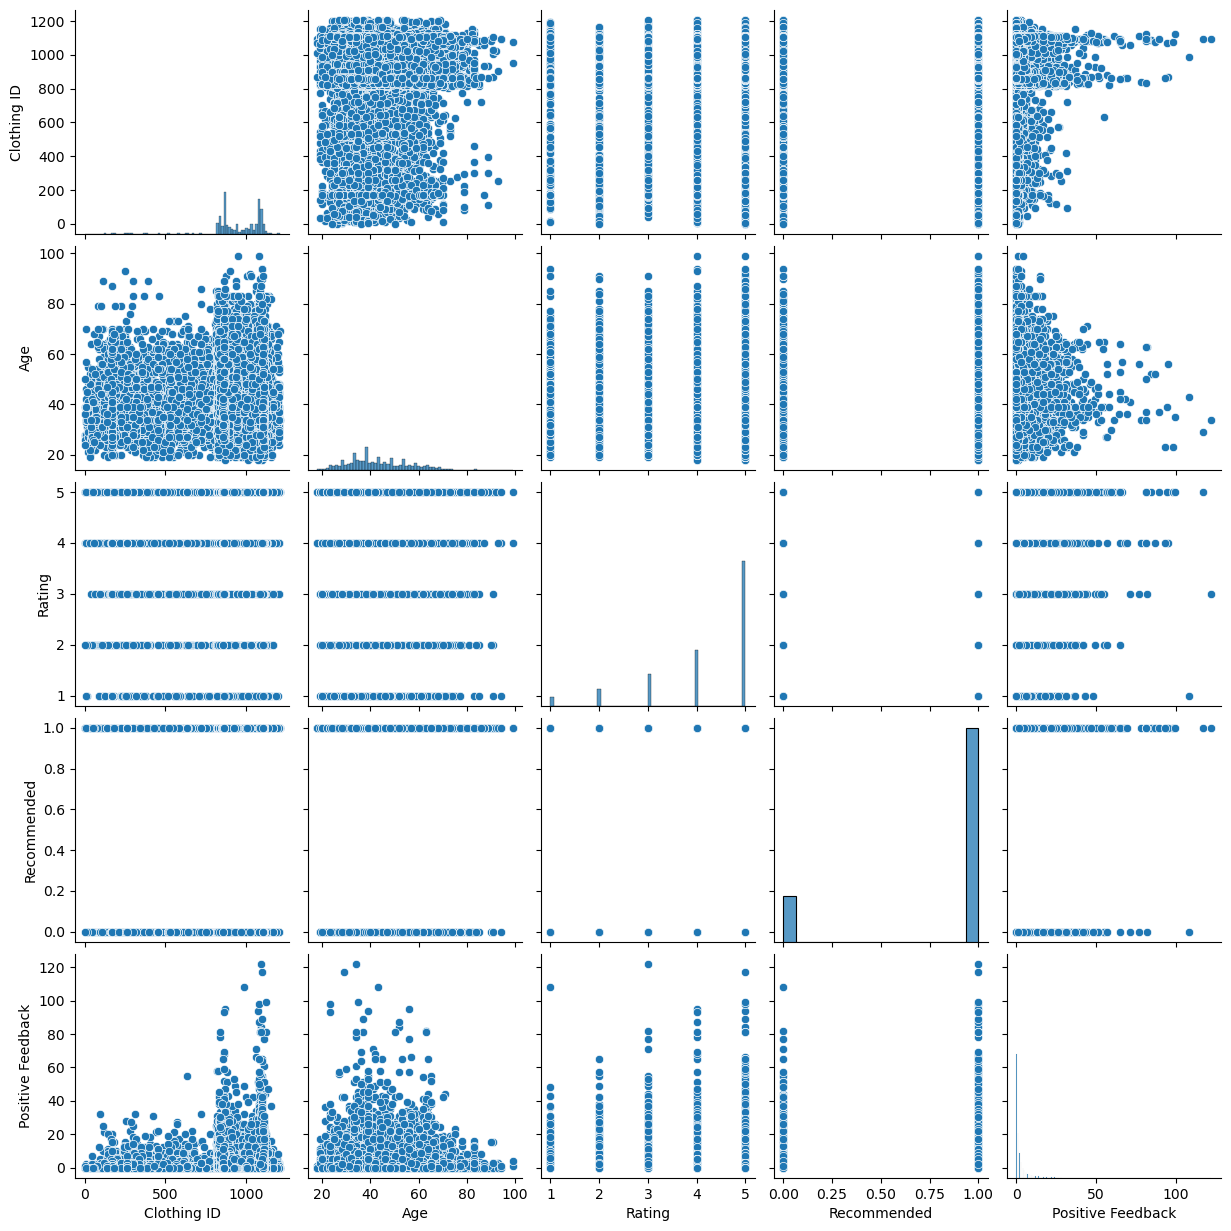

In [10]:
sns.pairplot(df)

## **Data Preprocessing**

In [11]:
#we have all values object which are not present or they are not here either drop rows or fill it
df[df['Review']==""]=np.NaN

In [12]:
df['Review'].fillna("No Review",inplace=True)

In [13]:
df.isnull().sum()

Clothing ID             0
Age                     0
Title                3810
Review                  0
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

## **Define Target Variable (y) and Feature Variables (X)**

In [14]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category'],
      dtype='object')

In [15]:
x = df['Review']

In [16]:
y = df['Rating']

In [17]:
df['Rating'].value_counts()

Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

## **Train Test Split**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7,stratify=y,random_state=2520)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16440,)
(7046,)
(16440,)
(7046,)


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer(lowercase=True,analyzer='word',ngram_range=(2,25),stop_words='english',max_features=50000)

In [23]:
X_train = cv.fit_transform(X_train)

In [24]:
cv.get_feature_names_out()

array(['00 petite', '00 regular', '00p 0p', ..., 'zipper zip',
       'zippered pockets', 'zippers buttons'], dtype=object)

In [25]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
X_test = cv.transform(X_test)

In [27]:
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## **Modeling**

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
model = MultinomialNB()

In [30]:
model.fit(X_train,y_train)

MultinomialNB()

## **Model Evaluation**

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred = model.predict(X_test)

In [33]:
print("Accuracy Is",accuracy_score(y_test,y_pred))

Accuracy Is 0.5973602043712745


In [34]:
np.round(model.predict_proba(X_test),0)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
print(confusion_matrix(y_test,y_pred))

[[   8   47   83   45   70]
 [  10   37  185  101  137]
 [   4   51  241  262  303]
 [   2   14  118  400  989]
 [   0    7   69  340 3523]]


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.33      0.03      0.06       253
           2       0.24      0.08      0.12       470
           3       0.35      0.28      0.31       861
           4       0.35      0.26      0.30      1523
           5       0.70      0.89      0.79      3939

    accuracy                           0.60      7046
   macro avg       0.39      0.31      0.31      7046
weighted avg       0.54      0.60      0.55      7046



## **Prediction**

In [38]:
prediction = ["I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c"]

In [39]:
save = cv.transform(prediction)

In [40]:
save.toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
model.predict(save)

array([3], dtype=int64)

In [43]:
np.round(model.predict_proba(save),5)

array([[0., 0., 1., 0., 0.]])

## **Explaination**

This project uses a Multinomial Naive Bayes classifier to predict clothing review ratings based on text data. The dataset contains reviews and ratings of women's clothing from an e-commerce platform. The process involves preprocessing text data, including handling missing values and converting text to a numerical format using `CountVectorizer`. The data is split into training and test sets, and a Naive Bayes model is trained on the reviews. Model performance is evaluated using accuracy, confusion matrix, and classification report, and predictions are made on new review samples.